In [1]:
!pip install Pillow
!pip install pandas
!pip install mplcursors

# Analysis of the customer's place of residence

In [2]:
# open excel file
%matplotlib notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mplcursors

excel_file_path = "Customers.xlsx"
df = pd.read_excel(excel_file_path)
print(df)

     CustomerId FirstName      Surname                  Email Address  \
0             1    Julian    Dąbrowski   julian.dąbrowski@hotmail.com   
1             2   Cyprian      Woźniak      cyprian.woźniak@gmail.com   
2             3     Piotr     Kowalski       piotr.kowalski@gmail.com   
3             4   Olgierd    Kowalczyk    olgierd.kowalczyk@gmail.com   
4             5    Lucyna   Wiśniewska    lucyna.wiśniewska@gmail.com   
..          ...       ...          ...                            ...   
395         396  Krystian          Lis             krystian.lis@wp.pl   
396         397   Mateusz      Woźniak          mateusz.woźniak@wp.pl   
397         398    Damian      Sawicki           damian.sawicki@wp.pl   
398         399   Bartosz    Borkowski        bartosz.borkowski@wp.pl   
399         400   Liliana  Tomaszewska  liliana.tomaszewska@gmail.com   

         City      Mailbox  
0    Warszawa  hotmail.com  
1      Gdańsk    gmail.com  
2    Szczecin    gmail.com  
3     R

In [6]:
#show only unique values from column 'City'
cities = set(df.loc[:,'City'])
print(cities)

{'Wrocław', 'Poznań', 'Gliwice', 'Warszawa', 'Kraków', 'Rzeszów', 'Opole', 'Gdynia', 'Toruń', 'Białystok', 'Bydgoszcz', 'Elbląg', 'Koszalin', 'Katowice', 'Gdańsk', 'Radom', 'Łódź', 'Kalisz', 'Włocławek', 'Częstochowa', 'Zielona Góra', 'Słupsk', 'Szczecin', 'Lublin', 'Płock'}


In [7]:
#show all values from column 'City'
cities_list = list(df.loc[:,'City'])
print(cities_list)

['Warszawa', 'Gdańsk', 'Szczecin', 'Rzeszów', 'Toruń', 'Częstochowa', 'Katowice', 'Gdynia', 'Gdańsk', 'Łódź', 'Wrocław', 'Szczecin', 'Kraków', 'Opole', 'Toruń', 'Warszawa', 'Warszawa', 'Opole', 'Gdańsk', 'Toruń', 'Wrocław', 'Wrocław', 'Łódź', 'Wrocław', 'Częstochowa', 'Płock', 'Opole', 'Kalisz', 'Łódź', 'Łódź', 'Warszawa', 'Wrocław', 'Płock', 'Poznań', 'Białystok', 'Radom', 'Płock', 'Gdynia', 'Łódź', 'Łódź', 'Poznań', 'Gdynia', 'Warszawa', 'Warszawa', 'Białystok', 'Kalisz', 'Kraków', 'Łódź', 'Wrocław', 'Warszawa', 'Białystok', 'Gdynia', 'Poznań', 'Wrocław', 'Poznań', 'Białystok', 'Łódź', 'Warszawa', 'Łódź', 'Łódź', 'Łódź', 'Kraków', 'Kraków', 'Gliwice', 'Elbląg', 'Katowice', 'Gdańsk', 'Gdańsk', 'Katowice', 'Gdynia', 'Kraków', 'Wrocław', 'Radom', 'Gdańsk', 'Wrocław', 'Gdańsk', 'Toruń', 'Częstochowa', 'Poznań', 'Gliwice', 'Warszawa', 'Warszawa', 'Warszawa', 'Łódź', 'Łódź', 'Łódź', 'Częstochowa', 'Gliwice', 'Elbląg', 'Katowice', 'Poznań', 'Kraków', 'Gdańsk', 'Gdańsk', 'Koszalin', 'Kalisz'

In [8]:
#create dictionary with city as a key and count of customer in each city as value
d=dict()
for x in cities:
    d[x]= cities_list.count(x)
print(d)

{'Wrocław': 15, 'Poznań': 22, 'Gliwice': 10, 'Warszawa': 70, 'Kraków': 42, 'Rzeszów': 2, 'Opole': 6, 'Gdynia': 7, 'Toruń': 8, 'Białystok': 4, 'Bydgoszcz': 6, 'Elbląg': 11, 'Koszalin': 14, 'Katowice': 20, 'Gdańsk': 42, 'Radom': 6, 'Łódź': 58, 'Kalisz': 8, 'Włocławek': 3, 'Częstochowa': 14, 'Zielona Góra': 8, 'Słupsk': 3, 'Szczecin': 2, 'Lublin': 16, 'Płock': 3}


In [9]:
#sort values in dictionary in descending order
d2 = dict(sorted(d.items(), key=lambda d: d[1], reverse=True))
print(d2)

{'Warszawa': 70, 'Łódź': 58, 'Kraków': 42, 'Gdańsk': 42, 'Poznań': 22, 'Katowice': 20, 'Lublin': 16, 'Wrocław': 15, 'Koszalin': 14, 'Częstochowa': 14, 'Elbląg': 11, 'Gliwice': 10, 'Toruń': 8, 'Kalisz': 8, 'Zielona Góra': 8, 'Gdynia': 7, 'Opole': 6, 'Bydgoszcz': 6, 'Radom': 6, 'Białystok': 4, 'Włocławek': 3, 'Słupsk': 3, 'Płock': 3, 'Rzeszów': 2, 'Szczecin': 2}


<IPython.core.display.Javascript object>


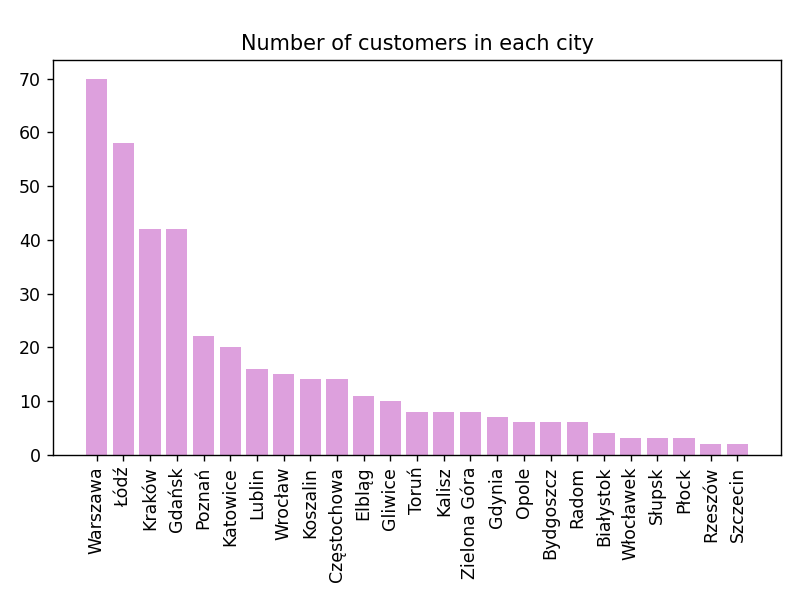

In [43]:
#create a box plot from dictionary
city = list(d2.keys())
values = list(d2.values())

plt.bar(range(len(d2)), values, tick_label=city, color = "plum")
plt.xticks(rotation='vertical')
plt.title('Number of customers in each city')
plt.tight_layout()
plt.subplots_adjust(top=0.9)

#add cursor to hover city and value
cursor = mplcursors.cursor(hover=mplcursors.HoverMode.Transient)
@cursor.connect("add")
def on_add(sel):
    x, y, width, height = sel.artist[sel.index].get_bbox().bounds
    sel.annotation.set(text=f"{city[sel.target.index]} : {int(height)}",
                       position=(0, 20), anncoords="offset points")
    sel.annotation.xy = (x + width / 2, y + height)
    
plt.show()